In [ ]:
import os
import random
import cv2

import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
# !unzip drive/MyDrive/Kvasir-SEG.zip

Archive:  drive/MyDrive/Kvasir-SEG.zip
   creating: Kvasir-SEG/images/
  inflating: Kvasir-SEG/images/cju0qkwl35piu0993l0dewei2.jpg  
  inflating: Kvasir-SEG/images/cju0qoxqj9q6s0835b43399p4.jpg  
  inflating: Kvasir-SEG/images/cju0qx73cjw570799j4n5cjze.jpg  
  inflating: Kvasir-SEG/images/cju0roawvklrq0799vmjorwfv.jpg  
  inflating: Kvasir-SEG/images/cju0rx1idathl0835detmsp84.jpg  
  inflating: Kvasir-SEG/images/cju0s2a9ekvms080138tjjpxr.jpg  
  inflating: Kvasir-SEG/images/cju0s690hkp960855tjuaqvv0.jpg  
  inflating: Kvasir-SEG/images/cju0sr5ghl0nd08789uzf1raf.jpg  
  inflating: Kvasir-SEG/images/cju0sxqiclckk08551ycbwhno.jpg  
  inflating: Kvasir-SEG/images/cju0t4oil7vzk099370nun5h9.jpg  
  inflating: Kvasir-SEG/images/cju0tl3uz8blh0993wxvn7ly3.jpg  
  inflating: Kvasir-SEG/images/cju0u2g7pmnux0801vkk47ivj.jpg  
  inflating: Kvasir-SEG/images/cju0u82z3cuma0835wlxrnrjv.jpg  
  inflating: Kvasir-SEG/images/cju0ue769mxii08019zqgdbxn.jpg  
  inflating: Kvasir-SEG/images/cju0vtox5ain6099

# Dataset Familiarization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define directories of images and masks

IMGS_DIR = './Kvasir-SEG/images/'
MSKS_DIR = './Kvasir-SEG/masks/'

In [ ]:
# Generate full path for all images and masks
# Sort paths to make coresponding images and mask

imgs_paths = [IMGS_DIR + filename for filename in sorted(os.listdir(IMGS_DIR))]
msks_paths = [MSKS_DIR + filename for filename in sorted(os.listdir(MSKS_DIR))]
print(len(imgs_paths))
print(imgs_paths[:3])
print(len(msks_paths))
print(msks_paths[:3])

1000
['./Kvasir-SEG/images/cju0qkwl35piu0993l0dewei2.jpg', './Kvasir-SEG/images/cju0qoxqj9q6s0835b43399p4.jpg', './Kvasir-SEG/images/cju0qx73cjw570799j4n5cjze.jpg']
1000
['./Kvasir-SEG/masks/cju0qkwl35piu0993l0dewei2.jpg', './Kvasir-SEG/masks/cju0qoxqj9q6s0835b43399p4.jpg', './Kvasir-SEG/masks/cju0qx73cjw570799j4n5cjze.jpg']


In [ ]:
# Generate a random index

img_idx = random.randint(0, len(imgs_paths) - 1)
img_idx

617

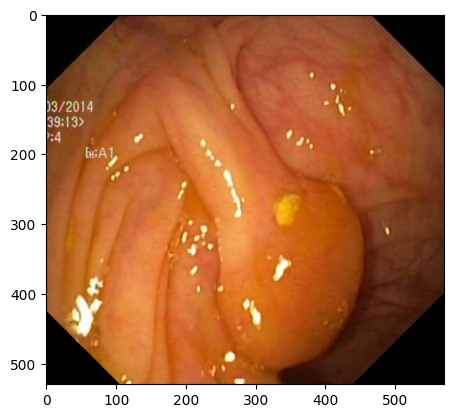

In [ ]:
# Read an image and show it

# Read the image using OpenCV
img = cv2.imread(imgs_paths[img_idx])

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.show()


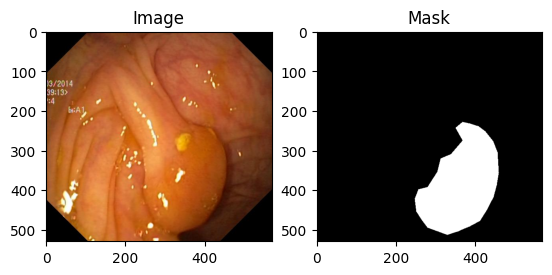

In [ ]:
# Show the image and its mask together

# Read the corresponding mask
msk = cv2.imread(msks_paths[img_idx], 0)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Display the image in the first subplot
ax1.imshow(img_rgb)
ax1.set_title('Image')

# Display the mask in the second subplot
ax2.imshow(msk, cmap='gray')
ax2.set_title('Mask')

# Show the figure
plt.show()


# Train-Validation-Test Split

In [ ]:
len(msks_paths)

1000

In [ ]:
# Split the data into train, validation, and test sets

imgs_paths_train, imgs_paths_valtest, msks_paths_train, msks_paths_valtest = train_test_split(imgs_paths, msks_paths, test_size=0.2, random_state=42)
imgs_paths_val, imgs_paths_test, msks_paths_val, msks_paths_test = train_test_split(imgs_paths_valtest, msks_paths_valtest, test_size=0.5, random_state=42)

print(f"imgs_train: {len(imgs_paths_train)}")
print(f"msks_train: {len(msks_paths_train)}")
print(f"imgs_val: {len(imgs_paths_val)}")
print(f"msks_val: {len(msks_paths_val)}")
print(f"imgs_test: {len(imgs_paths_test)}")
print(f"msks_test: {len(msks_paths_test)}")

imgs_train: 800
msks_train: 800
imgs_val: 100
msks_val: 100
imgs_test: 100
msks_test: 100


# Load Data

In [ ]:
# Read the images and masks

imgs_train = [cv2.imread(path) for path in tqdm(imgs_paths_train)]
msks_train = [cv2.imread(path, 0) for path in tqdm(msks_paths_train)]

imgs_val = [cv2.imread(path) for path in tqdm(imgs_paths_val)]
msks_val = [cv2.imread(path, 0) for path in tqdm(msks_paths_val)]

imgs_test = [cv2.imread(path) for path in tqdm(imgs_paths_test)]
msks_test = [cv2.imread(path, 0) for path in tqdm(msks_paths_test)]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
np.unique(msks_test[8])

array([  0,   1,   2,   3,   4,   5,   6,   7, 248, 249, 250, 251, 252,
       253, 254, 255], dtype=uint8)

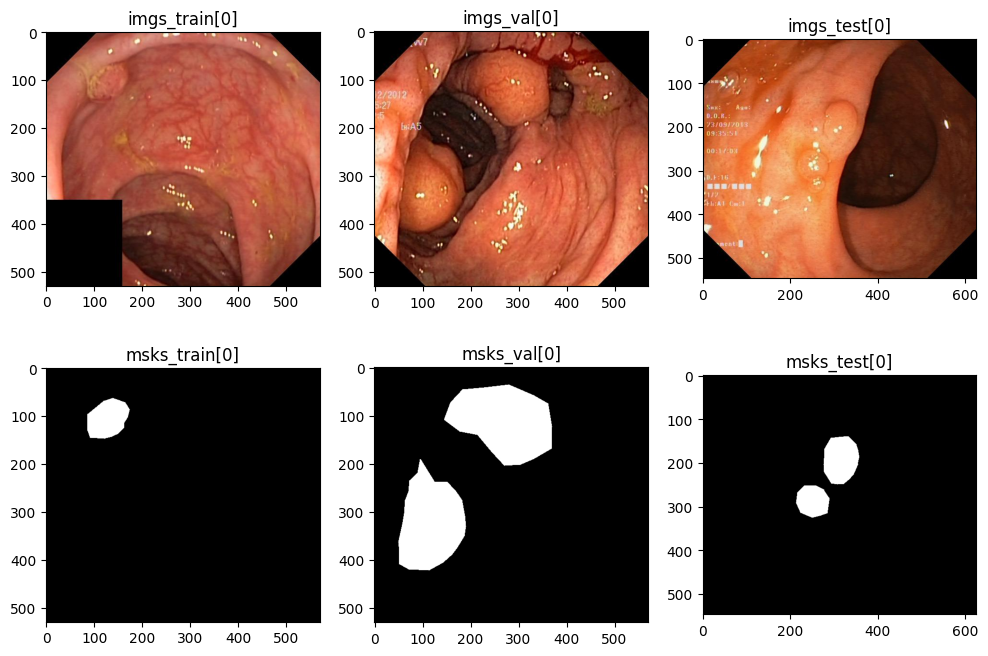

In [ ]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot the first image from each list
axs[0, 0].imshow(cv2.cvtColor(imgs_train[0], cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('imgs_train[0]')


axs[0, 1].imshow(cv2.cvtColor(imgs_val[0], cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('imgs_val[0]')

axs[0, 2].imshow(cv2.cvtColor(imgs_test[0], cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('imgs_test[0]')

axs[1, 0].imshow(msks_train[0], cmap='gray')
axs[1, 0].set_title('msks_train[0]')

axs[1, 1].imshow(msks_val[0], cmap='gray')
axs[1, 1].set_title('msks_val[0]')


axs[1, 2].imshow(msks_test[0], cmap='gray')
axs[1, 2].set_title('msks_test[0]')

# Show the figure
plt.show()


# Preprocessing

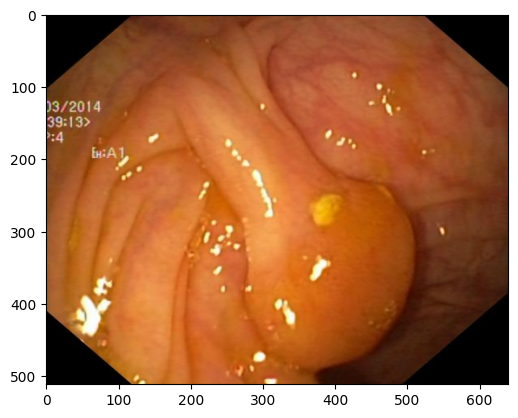

In [ ]:
# Regarding to the article re-scaled to 640 × 512,
# which respects the predominant rectangular aspect ratio
# in most polyp segmentation datasets

IMG_WIDTH = 640
IMG_HEIGHT = 512

resized_img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Apply resize function to all lists

imgs_train = [cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) for img in tqdm(imgs_train)]
msks_train = [cv2.resize(msk, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST) for msk in tqdm(msks_train)]

imgs_val = [cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) for img in tqdm(imgs_val)]
msks_val = [cv2.resize(msk, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST) for msk in tqdm(msks_val)]

imgs_test = [cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) for img in tqdm(imgs_test)]
msks_test = [cv2.resize(msk, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST) for msk in tqdm(msks_test)]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# Convert masks lists to binary (zero and one)

msks_train = [(msk > 127).astype(np.uint8) for msk in tqdm(msks_train)]
msks_val = [(msk > 127).astype(np.uint8) for msk in tqdm(msks_val)]
msks_test = [(msk > 127).astype(np.uint8) for msk in tqdm(msks_test)]


  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# Print shape of images inside each list

print(f"shape of images in imgs_train: {imgs_train[0].shape}")
print(f"shape of images in msks_train: {msks_train[0].shape}")
print(f"shape of images in imgs_val: {imgs_val[0].shape}")
print(f"shape of images in msks_val: {msks_val[0].shape}")
print(f"shape of images in imgs_test: {imgs_test[0].shape}")
print(f"shape of images in msks_test: {msks_test[0].shape}")


shape of images in imgs_train: (512, 640, 3)
shape of images in msks_train: (512, 640)
shape of images in imgs_val: (512, 640, 3)
shape of images in msks_val: (512, 640)
shape of images in imgs_test: (512, 640, 3)
shape of images in msks_test: (512, 640)


In [ ]:
np.unique(msks_train[12])

array([0, 1], dtype=uint8)

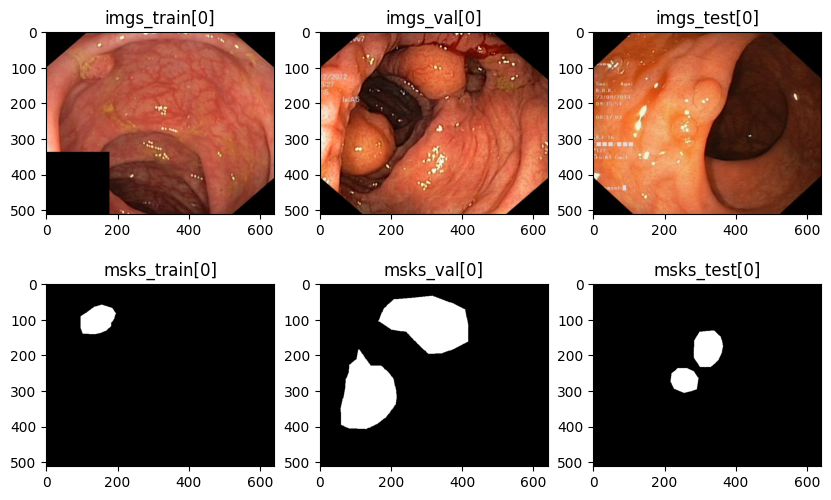

In [ ]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Plot the first image from each list
axs[0, 0].imshow(cv2.cvtColor(imgs_train[0], cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('imgs_train[0]')


axs[0, 1].imshow(cv2.cvtColor(imgs_val[0], cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('imgs_val[0]')

axs[0, 2].imshow(cv2.cvtColor(imgs_test[0], cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('imgs_test[0]')

axs[1, 0].imshow(msks_train[0], cmap='gray')
axs[1, 0].set_title('msks_train[0]')

axs[1, 1].imshow(msks_val[0], cmap='gray')
axs[1, 1].set_title('msks_val[0]')


axs[1, 2].imshow(msks_test[0], cmap='gray')
axs[1, 2].set_title('msks_test[0]')

# Show the figure
plt.show()

# Model Selection and Implementation (U-Net)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Input, MaxPool2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model, load_model

In [ ]:
# U-Net Model with Tensorflow

# convolutional block
def conv_block(x , num_filters) :
    x = Conv2D(num_filters, (3,3), padding="same")(x)
    x= BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, (3,3), padding="same")(x)
    x = BatchNormalization()(x)
    x= Activation("relu")(x)

    return x


# build the model

def build_unet_model(shape):

    # original sizes : 64, 128, 256, 512
    num_filters = [16,32,48,64]

    inputs = Input((shape))

    skip_x = []
    x= inputs

    # encoder Unet part

    for f in num_filters:
        x = conv_block(x , f)
        skip_x.append(x)
        x= MaxPool2D((2,2))(x)

    # bridge with 1024 filters
    x = conv_block(x, 128)


    # prepare for the decoder
    num_filters.reverse()
    skip_x.reverse()

    # Decoder Unet part
    for i, f in enumerate(num_filters):
        x = UpSampling2D((2,2))(x)
        xs = skip_x[i]
        x = Concatenate()([x,xs])
        x= conv_block(x,f)

    #output
    x = Conv2D(1, (1,1) , padding="same")(x)
    x = Activation("sigmoid")(x) # since it is a binary classification and segmentation

    return Model(inputs,x)

In [ ]:
model = build_unet_model((IMG_HEIGHT, IMG_WIDTH, 3))

In [ ]:
def show_result(img, msk, pred):
  # Show the image, ground truth, and predicted mask
  plt.figure(figsize=(12, 8))

  # Image
  plt.subplot(1, 3, 1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title('Image')

  # Ground truth
  plt.subplot(1, 3, 2)
  plt.imshow(msk, cmap='gray')
  plt.title('Ground Truth')

  # Predicted mask
  plt.subplot(1, 3, 3)
  plt.imshow(pred, cmap='gray')
  plt.title('Predicted Mask')

  plt.show()

1/1 [==============================] - 3s 3s/step


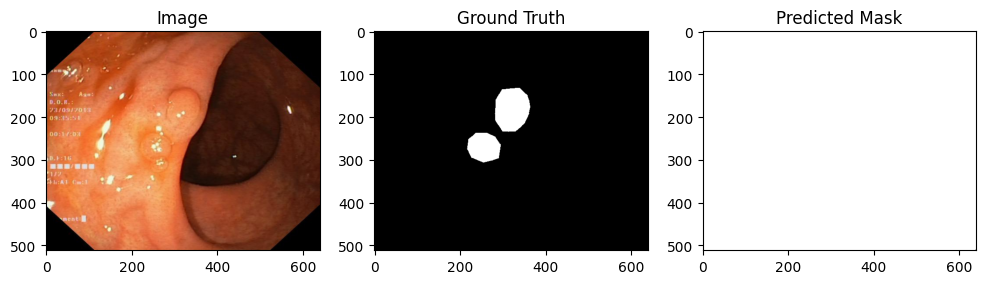

In [ ]:
# Predict an image before training to see if model is working

image = imgs_test[0]
mask = msks_test[0]
predicted_mask = model.predict(np.expand_dims(image, axis=0))[0]

show_result(image, mask, predicted_mask)

In [ ]:
np.unique(predicted_mask)

array([0.4903956 , 0.49904054, 0.49956587, ..., 0.99999976, 0.9999999 ,
       1.        ], dtype=float32)

# Training and Validation

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
# Compile unet_model using Intersection over Union

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=2)])

In [ ]:
print(np.array(imgs_train).shape)
print(np.array(msks_train).shape)

(800, 512, 640, 3)
(800, 512, 640)


In [ ]:
# prompt: train model

callbacks = [
            ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.1 , verbose=1, min_lr=1e-6),
            EarlyStopping(monitor="val_loss", patience=5, verbose=1) ]

history = model.fit(
    np.array(imgs_train),
    np.array(msks_train),
    batch_size=16,
    epochs=25,
    validation_data=(np.array(imgs_val), np.array(msks_val)),
    verbose=1,
)


Epoch 1/25
50/50 [==============================] - 80s 870ms/step - loss: 0.5932 - accuracy: 0.7320 - mean_io_u: 0.4246 - val_loss: 8.5081 - val_accuracy: 0.2917 - val_mean_io_u: 0.3532
Epoch 2/25
50/50 [==============================] - 41s 814ms/step - loss: 0.4392 - accuracy: 0.8439 - mean_io_u: 0.4249 - val_loss: 0.7949 - val_accuracy: 0.6377 - val_mean_io_u: 0.4238
Epoch 3/25
50/50 [==============================] - 43s 853ms/step - loss: 0.3948 - accuracy: 0.8479 - mean_io_u: 0.4246 - val_loss: 0.4636 - val_accuracy: 0.8252 - val_mean_io_u: 0.4245
Epoch 4/25
50/50 [==============================] - 41s 821ms/step - loss: 0.3780 - accuracy: 0.8477 - mean_io_u: 0.4247 - val_loss: 0.4196 - val_accuracy: 0.8473 - val_mean_io_u: 0.4243
Epoch 5/25
50/50 [==============================] - 42s 850ms/step - loss: 0.3611 - accuracy: 0.8478 - mean_io_u: 0.4247 - val_loss: 0.4383 - val_accuracy: 0.8312 - val_mean_io_u: 0.4236
Epoch 6/25
50/50 [==============================] - 41s 824ms/ste

In [ ]:
model.save('unet_model12.h5')

In [ ]:
model = load_model('unet_model10.h5')

1/1 [==============================] - 1s 578ms/step
1


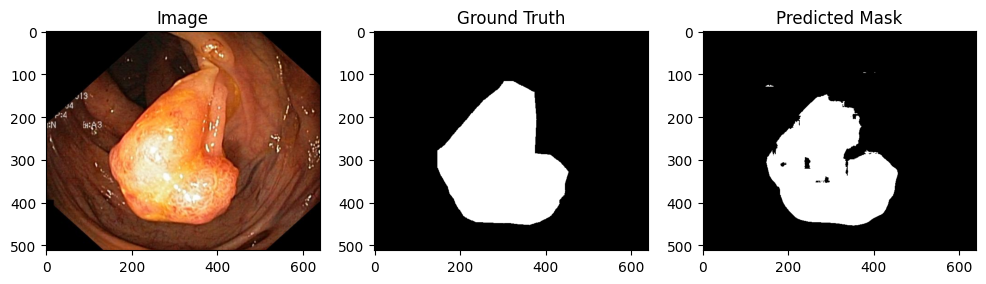

In [ ]:
# Predict an image after training

image = imgs_test[6]
mask = msks_test[6]
predicted_mask = model.predict(np.expand_dims(image, axis=0))[0]
# Convert the predicted mask to binayr (showable image)
predicted_mask = np.where(predicted_mask > 0.5, 1, 0)

print(predicted_mask.max())
show_result(image, mask, predicted_mask)

# Results and Analysis

In [ ]:
# Generate list of prediction masks

msks_pred = model.predict(np.array(imgs_test))
msks_pred = np.where(msks_pred > 0.5, 1, 0)
msks_pred = np.squeeze(msks_pred, axis=-1)

4/4 [==============================] - 56s 12s/step


In [ ]:
# Calculate iou score between msks_pred and msks_test

iou_scores = []
for i in range(len(msks_pred)):
  iou_score = tf.keras.metrics.MeanIoU(num_classes=2)(msks_test[i], msks_pred[i])
  iou_scores.append(iou_score)
mean_iou = sum(iou_scores) / len(iou_scores)
print("Mean IoU score:", mean_iou)


Mean IoU score: tf.Tensor(0.79094225, shape=(), dtype=float32)
